In [2]:
# import all necessary packages  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat

In [3]:
# Reading all datas 
benin_data = pd.read_csv("../data/benin_clean.csv", parse_dates=['Timestamp'])
sierraleone_data = pd.read_csv("../data/sierraleone_clean.csv", parse_dates=['Timestamp'])
togo_data = pd.read_csv("../data/togo_clean.csv", parse_dates=['Timestamp'])

In [4]:
# Add country labels 

import os

# Define the file paths
file_paths = {
    'Benin': '../data/benin_clean.csv',
    'Sierra Leone': '../data/sierraleone_clean.csv',
    'Togo': '../data/togo_clean.csv',
}

# Load the dataframes into a dictionary
dataframes = {}
for country, file_path in file_paths.items():
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Data file not found for {country}: {file_path}")
    dataframes[country] = pd.read_csv(file_path)

# Print the first few rows of each DataFrame to verify the data is loaded correctly
for country, df in dataframes.items():
    print(f"\n--- {country} ---")
    print(df.head())


--- Benin ---
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4

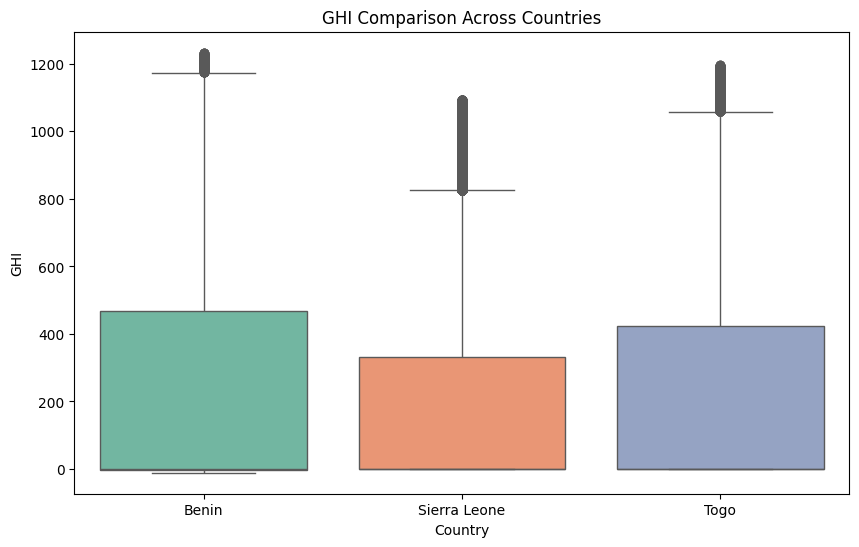

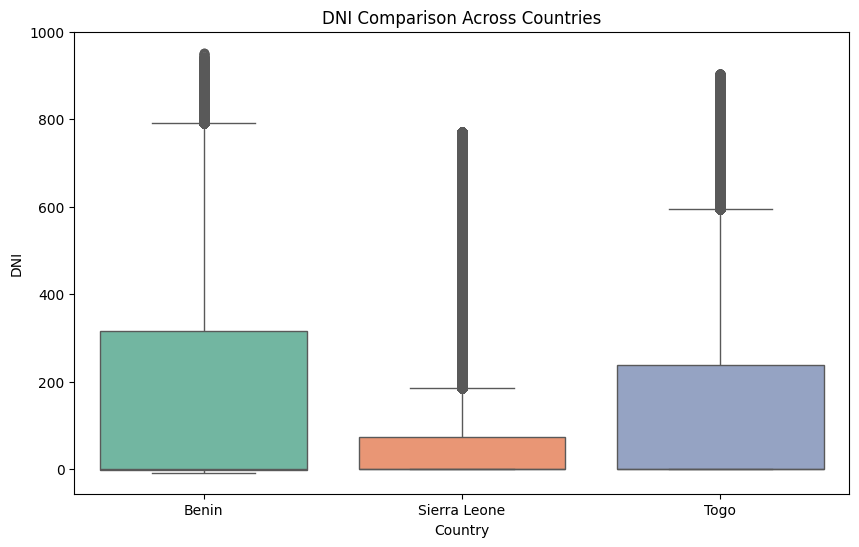

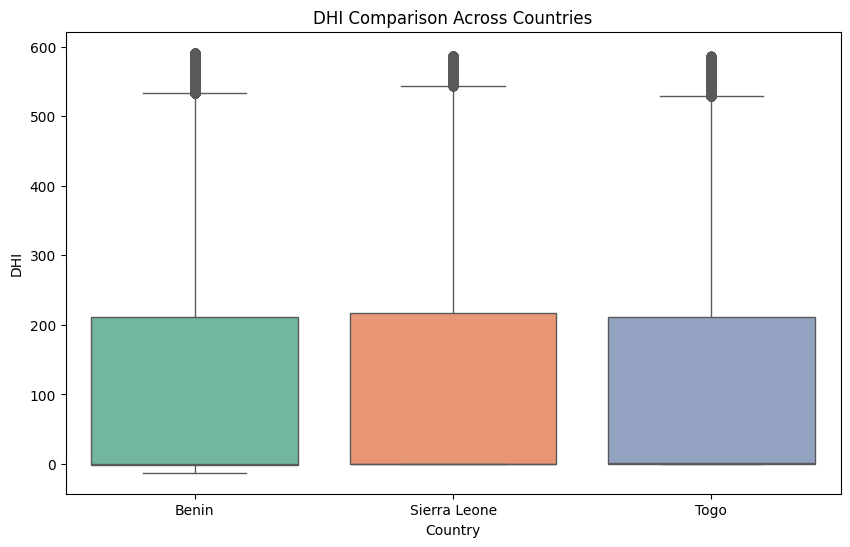


Summary Statistics:
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  187.214752    0.0  277.016414  104.210233    0.0  200.824799   
Togo          225.028731    0.5  316.449213  147.968936    0.0  247.676535   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  110.503601    0.0  151.444586  
Togo          112.777219    1.5  151.567919  


In [6]:
# metric comparison with box plots and summary table

## creating boxplots
# Concatenate the dataframes and add a 'Country' column

combined_df = pd.concat([
    dataframes['Benin'].assign(Country='Benin'),
    dataframes['Sierra Leone'].assign(Country='Sierra Leone'),
    dataframes['Togo'].assign(Country='Togo')
])

# Create boxplots for GHI, DNI, and DHI, with color differentiation

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country', y=metric, hue='Country', data=combined_df, palette='Set2') # Added hue and palette
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.show()

## creating summary table
# Calculate summary statistics for each metric and country

summary_data = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Print the summary table
print("\nSummary Statistics:")
print(summary_data)

In [9]:
#Statistical Testing: using ANOVA on GHI values to assess whether differences between countries are significant.

'''ANOVA (Analysis of Variance) is a statistical test used to compare the means of two or more groups.  
It's a way to determine if there are any statistically significant differences between the average values of the groups.'''

from scipy import stats

# Perform one-way ANOVA on GHI
ghi_benin = dataframes['Benin']['GHI']
ghi_sierra_leone = dataframes['Sierra Leone']['GHI']
ghi_togo = dataframes['Togo']['GHI']

f_statistic, p_value = stats.f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)

print(f"\nOne-way ANOVA on GHI:")
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The differences in GHI between the countries are statistically significant.")
else:
    print("There is no significant difference in GHI between the countries.")


One-way ANOVA on GHI:
F-statistic: 3557.316
P-value: 0.000
The differences in GHI between the countries are statistically significant.


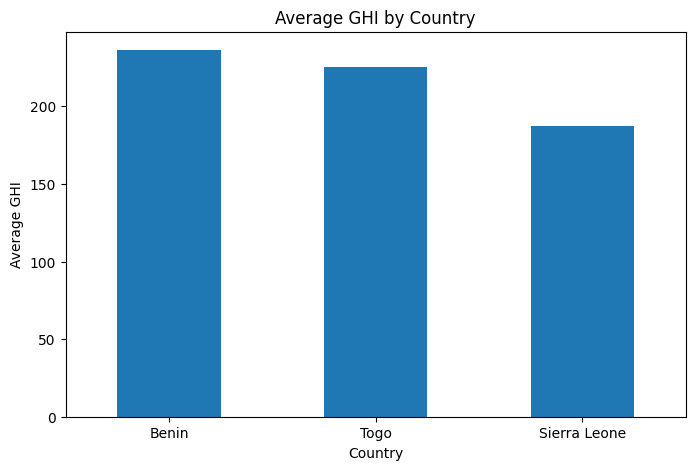


Ranking of Countries by Average GHI:
Country
Benin           236.234508
Togo            225.028731
Sierra Leone    187.214752
Name: GHI, dtype: float64


In [10]:
# Calculate average GHI for each country
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar')
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=0)
plt.show()

# Print the ranking
print("\nRanking of Countries by Average GHI:")
print(avg_ghi)